In [6]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import csv

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from experiment_helpers.metrics import * 
from src.solvers import *
from src.syntetic import *




In [2]:
def plot_error_results(ax, results, method):
    """Plot the accuracy comparison for a specific method on a given axis."""
    ax.set_title(f'Accuracy Comparison - {method}')
    ax.set_ylabel(method)
    ax.set_xlabel('Test Size')
    
  
    independent = [experiment['train_size'] for experiment in results]
    graph_accuracy = [experiment['graph_accuracy'] for experiment in results]
    hyper_graph_accuracy = [experiment['hyper_graph_accuracy'] for experiment in results]

    ax.plot(independent, graph_accuracy, label='Standard Graph Accuracy', marker='o')
    ax.plot(independent, hyper_graph_accuracy, label='Hyper-graph Accuracy', marker='s')

    ax.legend()
    # ax.grid(True)

def plot_all_error_results(results_dict):
    """Plot the error comparison for all methods in a single row."""
    methods = list(results_dict.keys())
    num_methods = len(methods)
    
    fig, axs = plt.subplots(1, num_methods, figsize=(6 * num_methods, 6))

    for i, method in enumerate(methods):
        plot_error_results(axs[i], results_dict[method], method)
    
    plt.tight_layout()
    plt.show()

def measure_experiment(predicted_scores : dict[str:int], ground_truth_scores: dict[str:int], loss_measurement: str) -> float:

    if loss_measurement == 'rms':
        return calculate_rms(predicted_scores, ground_truth_scores)
    elif loss_measurement == 'rho':
        return calculate_rho(predicted_scores, ground_truth_scores)
    elif loss_measurement == 'tau':
        return calculate_tau(predicted_scores, ground_truth_scores)
    else:
        return 0 



def run_all_metrics(M, N, K1, K2): 

    rms = test_training_size(N,M,K1,K2, loss_measurement ='rms')
    rho = test_training_size(N,M,K1,K2, loss_measurement = 'rho')
    tau = test_training_size(N,M,K1,K2, loss_measurement = 'tau')

    results_dict = {
        'rms': rms,
        'rho': rho,
        'tau': tau
    }

    plot_all_error_results(results_dict)
    


def save_results_to_csv(filename, results):
    fieldnames = ['N', 'M', 'K1', 'K2', 'train_size', 'graph_accuracy', 'hyper_graph_accuracy', 'loss_measurement']
    file_exists = os.path.isfile(filename)
    
    with open(filename, mode='a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        if not file_exists:
            writer.writeheader()
        for result in results:
            writer.writerow(result)
   

[{'loss_measurement': 'rms', 'train_size': 0.0, 'graph_accuracy': [1.7429105392866113], 'hyper_graph_accuracy': [1.7429105392866113]}, {'loss_measurement': 'rms', 'train_size': 0.1, 'graph_accuracy': [1.7446000322722823], 'hyper_graph_accuracy': [1.7446000322722823]}, {'loss_measurement': 'rms', 'train_size': 0.2, 'graph_accuracy': [1.7269667890261071], 'hyper_graph_accuracy': [1.7269667890261071]}, {'loss_measurement': 'rms', 'train_size': 0.30000000000000004, 'graph_accuracy': [1.7158051595000574], 'hyper_graph_accuracy': [1.7158051595000574]}, {'loss_measurement': 'rms', 'train_size': 0.4, 'graph_accuracy': [1.7009955611068677], 'hyper_graph_accuracy': [1.7009955611068677]}, {'loss_measurement': 'rms', 'train_size': 0.5, 'graph_accuracy': [1.7043120515478534], 'hyper_graph_accuracy': [1.7043120515478534]}, {'loss_measurement': 'rms', 'train_size': 0.6000000000000001, 'graph_accuracy': [1.6800077062553695], 'hyper_graph_accuracy': [1.6800077062553695]}, {'loss_measurement': 'rms', 't

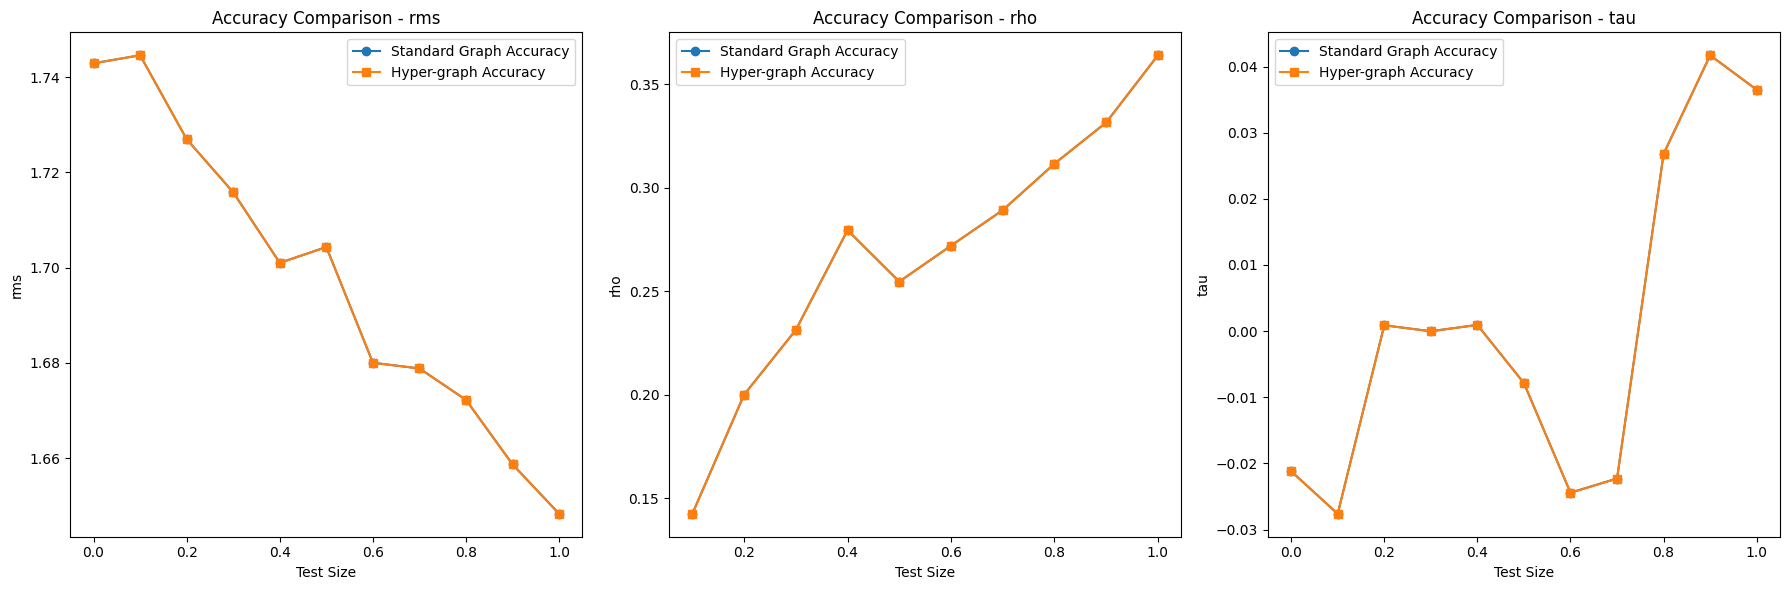

In [5]:
# Check dyadic hyperedges and standard graph produce the same results
run_all_metrics(250,750,2,2)


[{'loss_measurement': 'rms', 'train_size': 0.0, 'graph_accuracy': [1.7061686929360214], 'hyper_graph_accuracy': [1.7061686929360214]}, {'loss_measurement': 'rms', 'train_size': 0.1, 'graph_accuracy': [1.651157782120843], 'hyper_graph_accuracy': [1.652813785724772]}, {'loss_measurement': 'rms', 'train_size': 0.2, 'graph_accuracy': [1.6139011477269076], 'hyper_graph_accuracy': [1.6155704062908103]}, {'loss_measurement': 'rms', 'train_size': 0.30000000000000004, 'graph_accuracy': [1.5785556573187682], 'hyper_graph_accuracy': [1.5815404228650698]}, {'loss_measurement': 'rms', 'train_size': 0.4, 'graph_accuracy': [1.5455374159941528], 'hyper_graph_accuracy': [1.5478201756977312]}, {'loss_measurement': 'rms', 'train_size': 0.5, 'graph_accuracy': [1.47320418611731], 'hyper_graph_accuracy': [1.477133770356806]}, {'loss_measurement': 'rms', 'train_size': 0.6000000000000001, 'graph_accuracy': [1.435191728140281], 'hyper_graph_accuracy': [1.4410519215809425]}, {'loss_measurement': 'rms', 'train_s

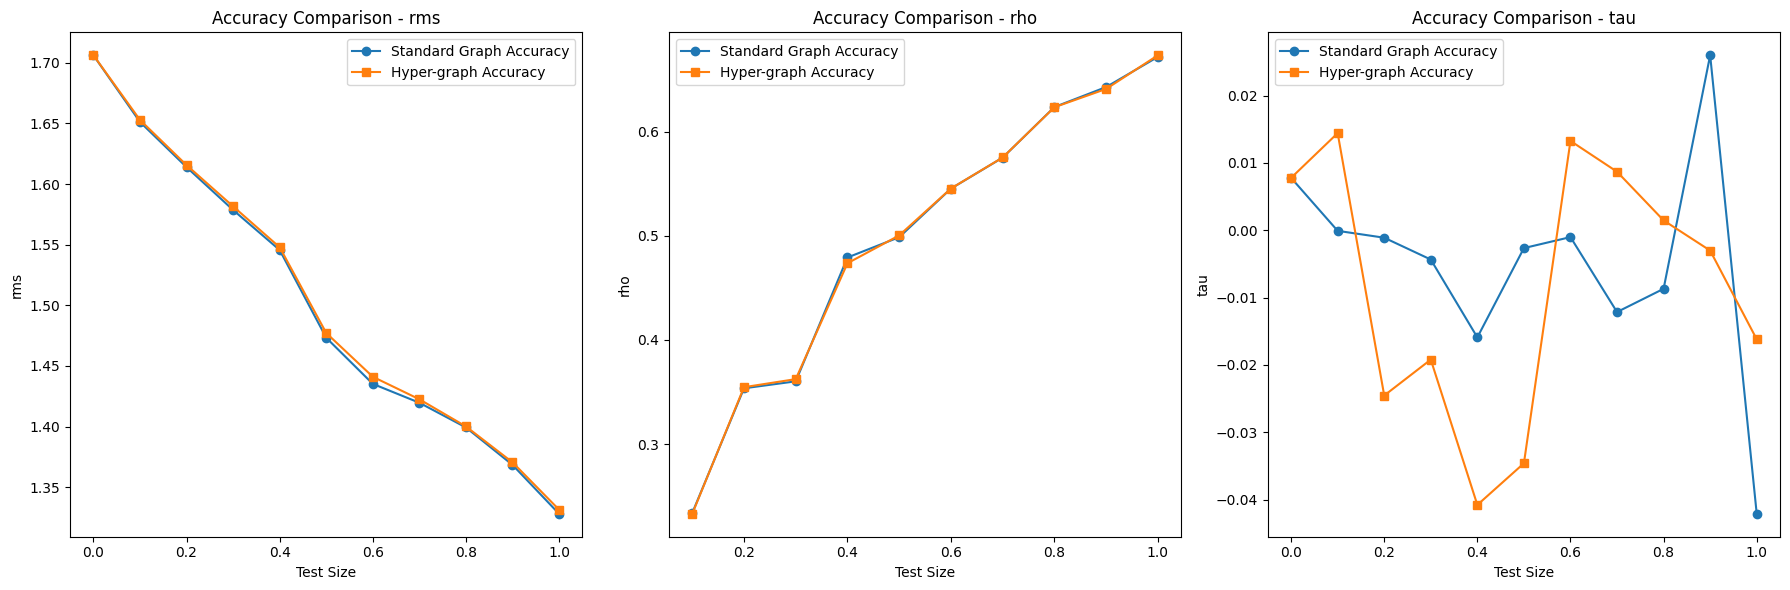

In [6]:
# Syntethic golf tournament example
run_all_metrics(1000,1500,2,4)


/home/jackyeung99/senior_thesis/higher_order_ranking/experiments/experiment_helpers/metrics.py:40: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_val = spearmanr(predicted_scores, true_scores)


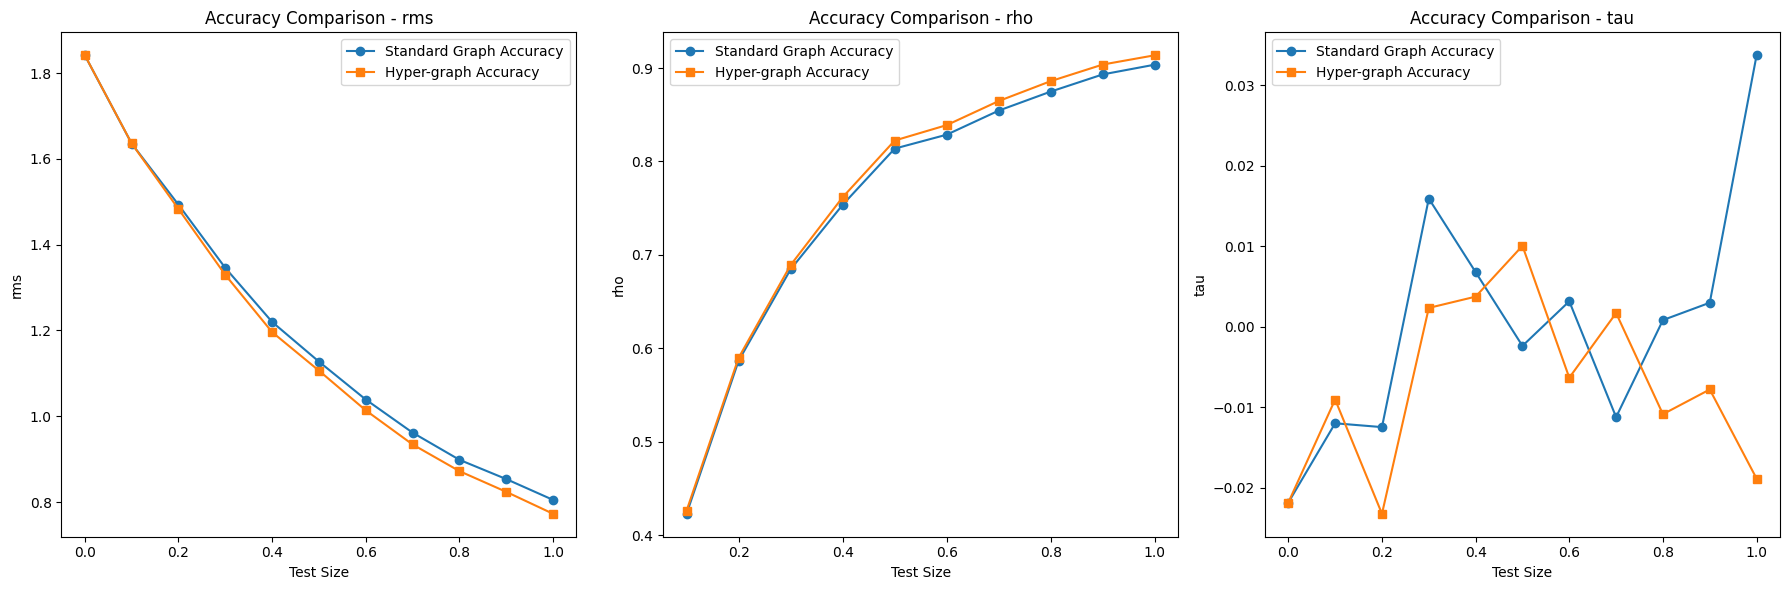

In [ ]:
# sample poker tournament
# stage one 
run_all_metrics(600,1200,9,10)

In [14]:




def test_M(N, M_values, K1, K2, filename):
    for M in M_values:      
        results = test_training_size(N, M, K1, K2, loss_measurement='rms')
        save_results_to_csv(filename, results)

def test_N(N_values, M, K1, K2, filename):
    for N in N_values:
        results = test_training_size(N, M, K1, K2, loss_measurement='rms')
        save_results_to_csv(filename, results)

def test_k_gap(N, M, K1, K2_values, filename):
    for K2 in K2_values:
        results = test_training_size(N, M, K1, K2, loss_measurement='rms')
        save_results_to_csv(filename, results)

def test_hyperedge_size(N, M, K_values, k_gap, filename):
    for k in K_values:
        K1 = k
        K2 = k+k_gap
        results = test_training_size(N, M, K1, K2, loss_measurement='rms')
        save_results_to_csv(filename, results)



In [15]:
N = 500 
M = 250 
K1 = 2 
K2 = 6
filename = 'experiment_results.csv'

# test M 

for _ in range(10): 
    m_test = range(200,2000,100)
    test_M(N, m_test, K1, K2,filename)

    n_test = range(200,2000,100)
    test_N(n_test, M, K1, K2, filename)

    K2_values = range(2, 20)
    test_k_gap(N,M,K1,K2_values, filename)

    K_values = range(2,15)
    test_hyperedge_size(N, M, K_values, 2, filename)

[{'loss_measurement': 'rms', 'train_size': 0.0, 'N': 500, 'M': 200, 'K1': 2, 'K2': 6, 'graph_accuracy': 1.9304415246680606, 'hyper_graph_accuracy': 1.9304415246680606}, {'loss_measurement': 'rms', 'train_size': 0.1, 'N': 500, 'M': 200, 'K1': 2, 'K2': 6, 'graph_accuracy': 1.8505837169683022, 'hyper_graph_accuracy': 1.8586980319309905}, {'loss_measurement': 'rms', 'train_size': 0.2, 'N': 500, 'M': 200, 'K1': 2, 'K2': 6, 'graph_accuracy': 1.7939610120376777, 'hyper_graph_accuracy': 1.803855380164473}, {'loss_measurement': 'rms', 'train_size': 0.30000000000000004, 'N': 500, 'M': 200, 'K1': 2, 'K2': 6, 'graph_accuracy': 1.7454122189863162, 'hyper_graph_accuracy': 1.7612450427813477}, {'loss_measurement': 'rms', 'train_size': 0.4, 'N': 500, 'M': 200, 'K1': 2, 'K2': 6, 'graph_accuracy': 1.7102266731648004, 'hyper_graph_accuracy': 1.7306627388844016}, {'loss_measurement': 'rms', 'train_size': 0.5, 'N': 500, 'M': 200, 'K1': 2, 'K2': 6, 'graph_accuracy': 1.6826458989678652, 'hyper_graph_accuracy

Parameter Search

In [12]:

def evaluate_model(N, M, K1, K2, repetitions=5):
    results = test_training_size(N, M, K1, K2, 'rms', repetitions)
    test_sizes = np.arange(0, 1.1, 0.1)
    graph_accuracies = np.array([res['graph_accuracy'] for res in results])
    hyper_graph_accuracies = np.array([res['hyper_graph_accuracy'] for res in results])
    return test_sizes, graph_accuracies, hyper_graph_accuracies


def compute_area_between_curves(x, y1, y2):
    area = np.trapz((y1 - y2), x)
    return area


def compute_areas_for_ratios(N, M_values, K1, K2, repetitions):
    ratios = []
    areas = []
    stds = []

    for M in M_values:
        area = []
        ratio = N / M
        ratios.append(ratio)
        for _ in range(repetitions):    
            _ , graph_acc, hyper_graph_acc = evaluate_model(N, M, K1, K2)
            area.append( compute_area_between_curves(np.arange(0, 1.1, 0.1), graph_acc, hyper_graph_acc))
            
        areas.append(np.mean(area))
        stds.append(np.std(area))

    return ratios, areas, stds


M_values = range(100, 2000, 50)

# Compute areas for different ratios of N and M
ratios, areas, stds = compute_areas_for_ratios(1000, M_values, K1=2, K2=4, repetitions=10)

[{'loss_measurement': 'rms', 'train_size': 0.0, 'N': 1000, 'M': 100, 'K1': 2, 'K2': 4, 'graph_accuracy': 1.7828159879955296, 'hyper_graph_accuracy': 1.7828159879955296}, {'loss_measurement': 'rms', 'train_size': 0.1, 'N': 1000, 'M': 100, 'K1': 2, 'K2': 4, 'graph_accuracy': 1.7743702755396267, 'hyper_graph_accuracy': 1.7743671786902835}, {'loss_measurement': 'rms', 'train_size': 0.2, 'N': 1000, 'M': 100, 'K1': 2, 'K2': 4, 'graph_accuracy': 1.7712466702909295, 'hyper_graph_accuracy': 1.7721743813503616}, {'loss_measurement': 'rms', 'train_size': 0.30000000000000004, 'N': 1000, 'M': 100, 'K1': 2, 'K2': 4, 'graph_accuracy': 1.7684573465159874, 'hyper_graph_accuracy': 1.7687818533838326}, {'loss_measurement': 'rms', 'train_size': 0.4, 'N': 1000, 'M': 100, 'K1': 2, 'K2': 4, 'graph_accuracy': 1.7520329210762535, 'hyper_graph_accuracy': 1.7529181049073008}, {'loss_measurement': 'rms', 'train_size': 0.5, 'N': 1000, 'M': 100, 'K1': 2, 'K2': 4, 'graph_accuracy': 1.7441027875643693, 'hyper_graph_a

KeyboardInterrupt: 

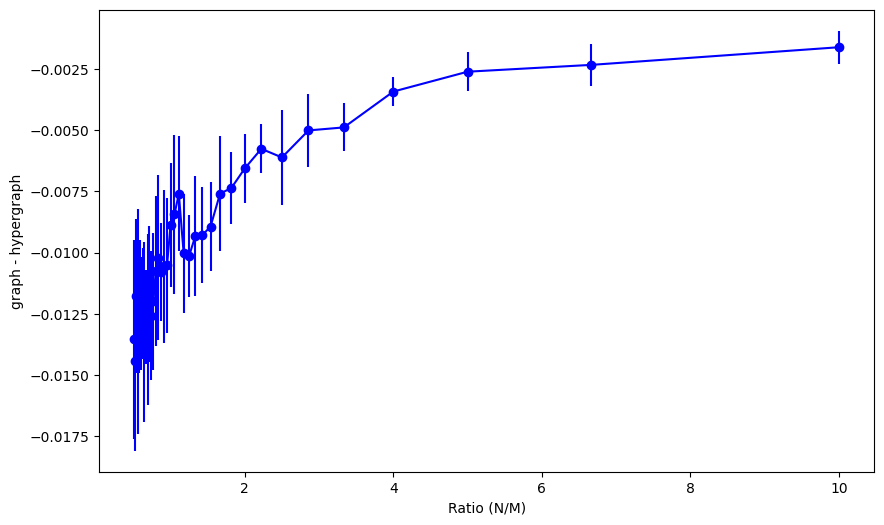

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(ratios, areas, yerr=stds, c='blue', marker='o')
plt.xlabel('Ratio (N/M)')
plt.ylabel('graph - hypergraph')
# plt.xscale('log')
plt.show()

In [11]:
experiment_results = pd.read_csv('experiment_results.csv')
grouped_results = experiment_results.groupby(['N', 'M', 'K1', 'K2', 'train_size'])
averaged_results = grouped_results[['graph_accuracy', 'hyper_graph_accuracy']].mean().reset_index()


TypeError: agg function failed [how->mean,dtype->object]

<Figure size 1200x600 with 0 Axes>